In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import petl as etl
import anhima
import zarr
import allel
import itertools
import random
import seaborn as sns
import petlx.bio
import csv
import scipy
import intervaltree

In [10]:
contigs = ['3L', '3R', '2R', '2L', 'X']

In [80]:
private_selection_coluzzi = etl.fromtsv('data/priv_sel_coluzzii.tab', delimiter='\t')
private_selection_coluzzi.displayall()

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g
X,AGAP000822,6,3,43.60784187,,,0
X,AGAP013181,30,5,35.3617250553,,,0
3L,AGAP010317,31,4,21.4591644894,28,1,0.672571683358
X,AGAP001031,16,3,20.5857330143,17,1,1.08359065663
3R,AGAP010302,42,4,16.1769208526,51,1,0.338725941884
X,AGAP001044,7,2,16.0409384341,17,1,1.08359065663
X,AGAP000833,81,5,13.792493708,203,2,0.444162760944
3R,AGAP010304,56,4,12.2441659849,,,0
2L,AGAP006634,14439,2,10.7362480363,,,0
X,AGAP001032,64,4,10.7201913983,106,2,1.1591295776


In [4]:
def center_pos(r):
    start = r.start
    end = r.end
    center = ((end - start) / 2) + start
    return int(center)

In [5]:
tbl_genes  = (etl
    .fromgff3('data/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz')
    .unpackdict('attributes')
    .cut(2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
    .addfield('center_gene', center_pos)
)
tbl_genes.display(10)

type,start,end,gene,center_gene
gene,157348,186936,AGAP004677,172142
gene,203779,205293,AGAP004678,204536
gene,207894,210460,AGAP004679,209177
gene,271285,271815,AGAP004680,271550
gene,358329,359280,AGAP004681,358804
gene,433503,461627,AGAP004682,447565
gene,485698,488369,AGAP004683,487033
gene,493039,493543,AGAP004684,493291
gene,493579,497632,AGAP004685,495605
gene,742004,747057,AGAP004686,744530


In [91]:
pos_coluzzii = private_selection_coluzzi.join(tbl_genes, key='gene')
pos_coluzzii

chrom,gene,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,type,start,end,center_gene
X,AGAP000820,9,1,1.90730425267,,,0,gene,15282061,15283387,15282724
X,AGAP000822,6,3,43.60784187,,,0,gene,15319510,15320904,15320207
X,AGAP000823,53,3,6.76952201995,,,0,gene,15327411,15333680,15330545
X,AGAP000825,30,2,4.51731191408,,,0,gene,15343949,15345874,15344911
X,AGAP000829,134,5,8.11421337267,354,1,0.0853899683924,gene,15355731,15364742,15360236


In [133]:
tbl_plot['segreg_c'].list()

['118', '31', '1949']

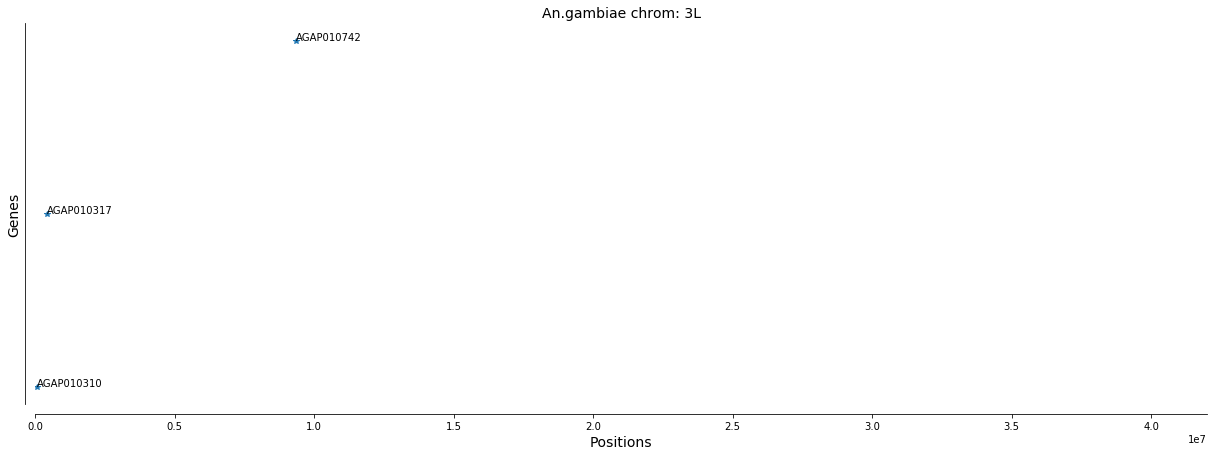

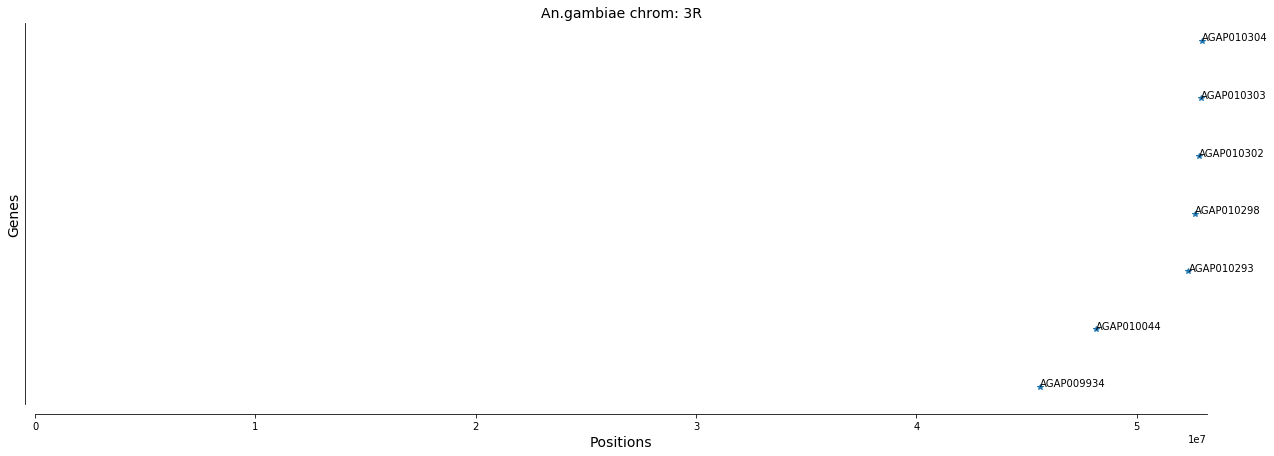

In [ ]:
for chrom in contigs:
    tbl_plot = pos_coluzzii.select(lambda r: r.chrom == chrom)
    y = tbl_plot['score_c'].list()
    n = tbl_plot['gene'].list()
    fig, ax = plt.subplots(figsize=(21,7))
    x = tbl_plot['center_gene'].list()
    ax.set_ylabel('Genes', fontsize=14)
    ax.set_xlabel('Positions', fontsize=14)
    ax.set_title('An.gambiae chrom: %s' % chrom, fontsize=14)
    ax.plot(x, y, '*')
    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]))
    ax.set_yticks([])
    len_chrom = {'X': 244e5, '3R': 532e5, '3L': 42e6, '2R': 616e5, '2L':493e5}
    ax.set_xlim(0, len_chrom[chrom])
    sns.despine(offset=10)
    plt.savefig('data/coluzzi_private_sel_%s.png' % chrom, dpi=500)